# import packages

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# load the dataset

In [25]:
url='https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df=pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# check for missing values and drop those columns

In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df.drop('Cabin', axis=1,inplace=True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
#drop all the values with missing values
df.dropna(inplace=True)

# converting sex into numeric value

In [30]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


# decide variables to use

In [31]:
X=df[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y=df['Survived']

# training and fitting the model

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=65)

In [33]:
dt=DecisionTreeClassifier(max_depth=3)
dt_model=dt.fit(x_train,y_train)

# Tree Visualization

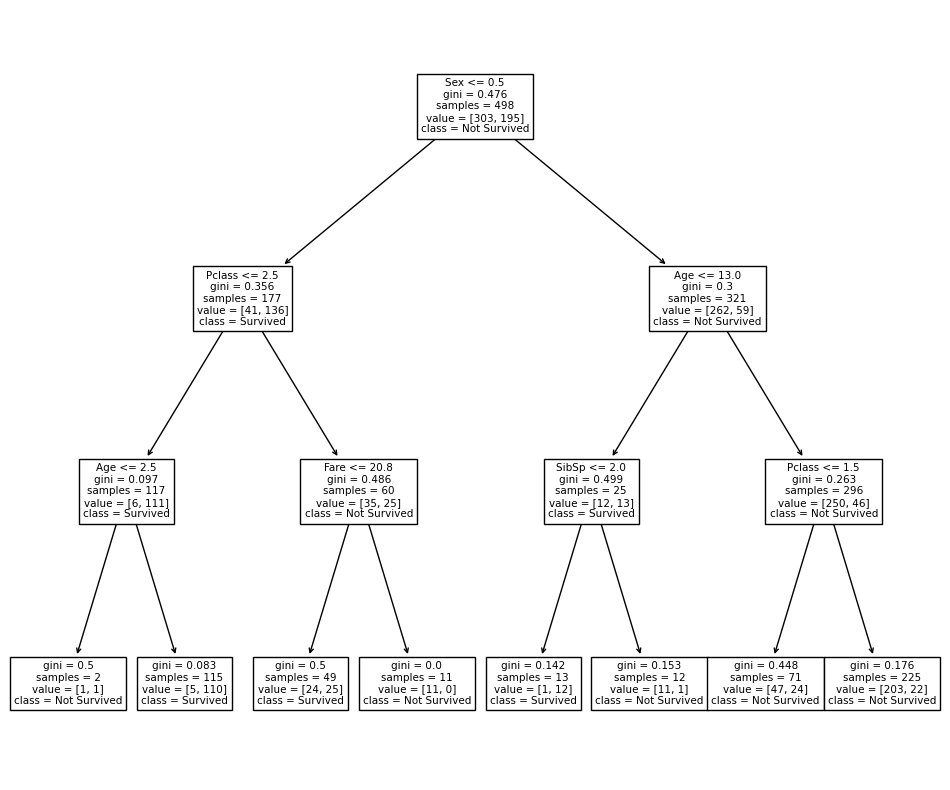

In [12]:
fig=plt.figure(figsize=(12,10))
tree.plot_tree(dt_model,feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare'], class_names=['Not Survived','Survived'])
plt.show()

# accuracy 

In [14]:
y_pred=dt.predict(x_test)

In [15]:
dt_model.score(x_test,y_test)

0.7990654205607477

In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       121
           1       0.82      0.69      0.75        93

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



Text(70.72222222222221, 0.5, 'y_pred')

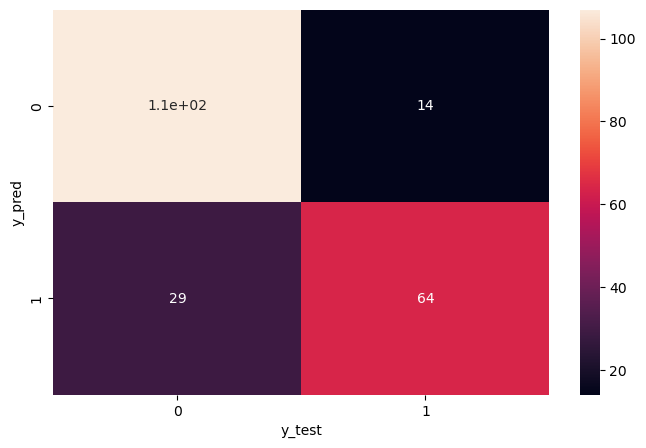

In [21]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,5))
sn.heatmap(cm,annot=True)
plt.xlabel('y_test')
plt.ylabel('y_pred')